<a href="https://colab.research.google.com/github/ms624atyale/Phonetics/blob/main/fx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 스펙트로그램과 특징추출 실습
본 페이지에서는 음성파일의 스펙트로그램과 멜스펙트로그램을 그려보는 실습을 진행합니다.

### 환경 설정

먼저 실습환경을 설정합니다. 아래 스크립트는 jupyter 환경을 기준으로 설명합니다. 일반 리눅스 환경에서는 먼저 https://github.com/pkyoung/a1003.git 를 내려받고 jupyter notebook을 실행하여 이 파일을 jupyter환경에서 열어봅니다

    git clone https://github.com/pkyoung/a1003.git ~/a1003
    conda create -n a1003 pythoon=3.10
    conda activate a1003
    pip install jupyter
    jupyter notebook --notebookdir ~/a1003/local
    
jupyter 환경이 아닌 일반 shell 환경에서도 실행가능합니다. 이 경우 conda 환경 안에서 ! 로 시작하는 명령어들을 순차적으로 실행합니다. !는 입력하지 않습니다.

1. 홈디렉토리에 a1003 디렉토리가 없으면, https://github.com/pkyoung/a1003.git 의 코드를 홈 디렉토리에 내려받습니다. Colab 환경에서는 홈디렉토리는 /content 입니다. 그 밖의 linux 환경에서는 홈디렉토리는 ~/ 입니다.
1. 실습은 a1003/local 디렉토리에서 수행합니다. 이 디렉토리로 이동합니다.

In [ ]:
# Run this cell to automatically clone the repo
import sys
import os
!pip install pickleshare
if 'google.colab' in sys.modules:
    if not os.path.exists("/content/a1003"):
        !git clone "https://github.com/pkyoung/a1003.git" /content/a1003
    %cd /content/a1003/local
else:
    if not os.path.exists(os.path.expanduser("~/a1003")):
        !git clone "https://github.com/pkyoung/a1003.git" ~/a1003
    %cd ~/a1003/local

Cloning into '/content/a1003'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 356 (delta 105), reused 104 (delta 35), pack-reused 148 (from 1)
Receiving objects: 100% (356/356), 70.75 MiB | 32.00 MiB/s, done.
Resolving deltas: 100% (160/160), done.
/content/a1003/local


### 로그멜 스펙트로그램

먼저 음성파일을 들어봅니다. AI hub에 한국어 비정형 자유발화 1000 시간 훈련 데이터 (정부 제공)

> Add blockquote



In [ ]:
from IPython.display import Audio
filename = "data/KsponSpeech_E00001.wav"
Audio(filename, autoplay=False)

librosa 패키지는 음성파일을 다루는데 널리 쓰이는 파이선 모듈입니다.
이 모듈을 이용해서 파일을 로드하고 스펙트로그램을 그립니다.
먼저 librosa 모듈을 설치합니다.

In [ ]:
!pip install librosa

In [ ]:
#about 15-sec data

import librosa
samples, sampling_rate = librosa.load(filename, sr=None)
len(samples), sampling_rate

(256544, 16000)

In [ ]:
!pip install matplotlib

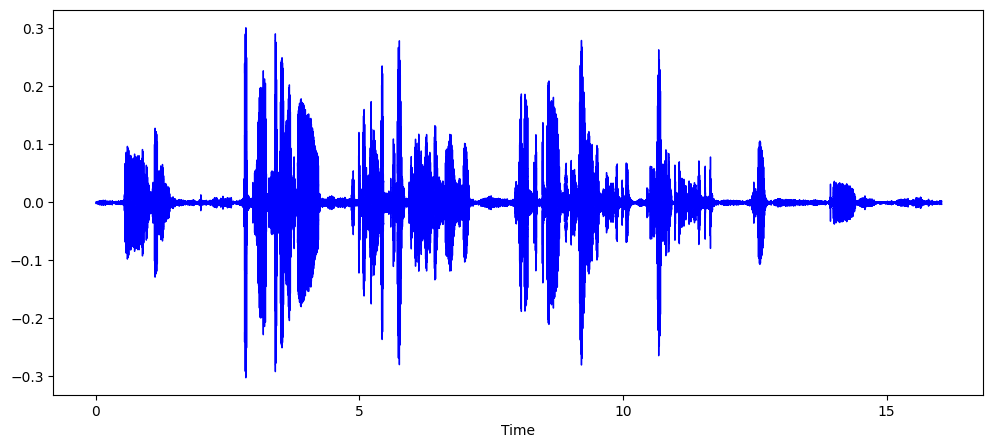

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
plt.rcParams["figure.figsize"]=12,5
from librosa import display
import numpy as np
plt.figure()
librosa.display.waveshow(y = samples, sr = sampling_rate, color='blue')
plt.show()

먼저 스펙트로그램을 그려봅니다. 변수들을 바꾸어가면서 어떤 변화가 있는지 관찰해봅니다.

%% 이게 삼각형 필터를 적용해서 레졸루션 한거다. n_fft & win_length 의 숫자를 같이 해서 finer resolusion 봐라

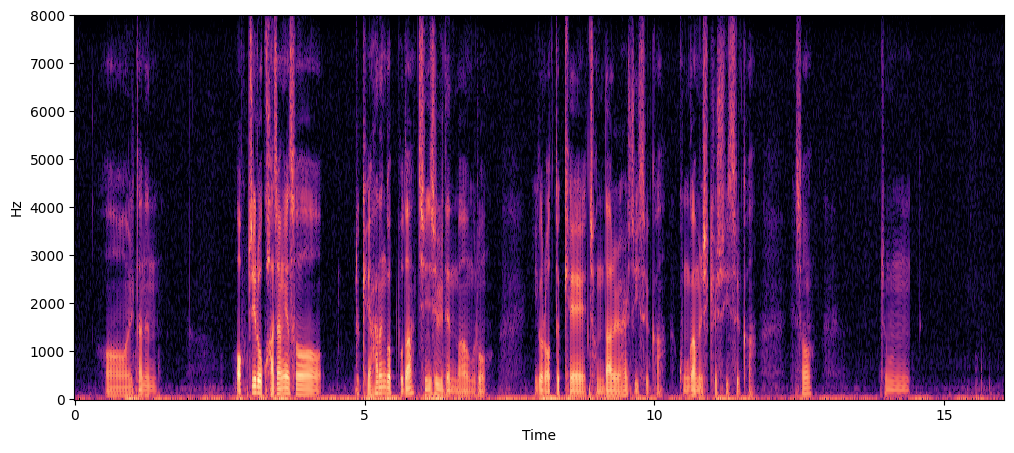

In [ ]:
hop_length = 160
n_fft = 512
win_length=320
window='hann'

stft = librosa.stft(samples, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
spectrogram = np.abs(stft)**2
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length=hop_length, y_axis="hz", x_axis="time")


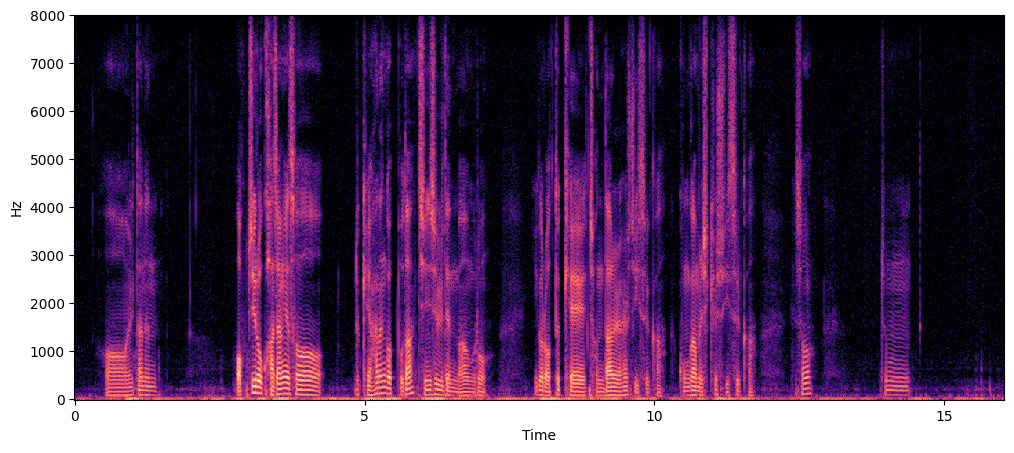

In [ ]:
hop_length = 160
n_fft = 1024
win_length=1024
window='hann'

stft = librosa.stft(samples, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
spectrogram = np.abs(stft)**2
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length=hop_length, y_axis="hz", x_axis="time")

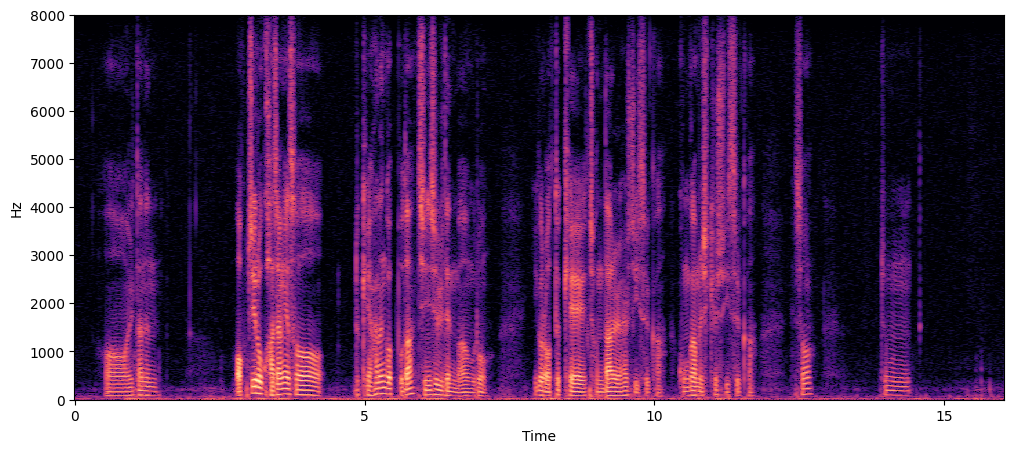

In [ ]:
#finer spectrogram

hop_length = 160
n_fft = 2024
win_length=2024
window='hann'

stft = librosa.stft(samples, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
spectrogram = np.abs(stft)**2
log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length=hop_length, y_axis="hz", x_axis="time")#

이제 멜스펙트로그램을 그려봅니다. 변수들을 바꾸어가면서 어떤 변화가 있는지 관찰해봅니다.

Text(0.5, 0, 'Frame Index')

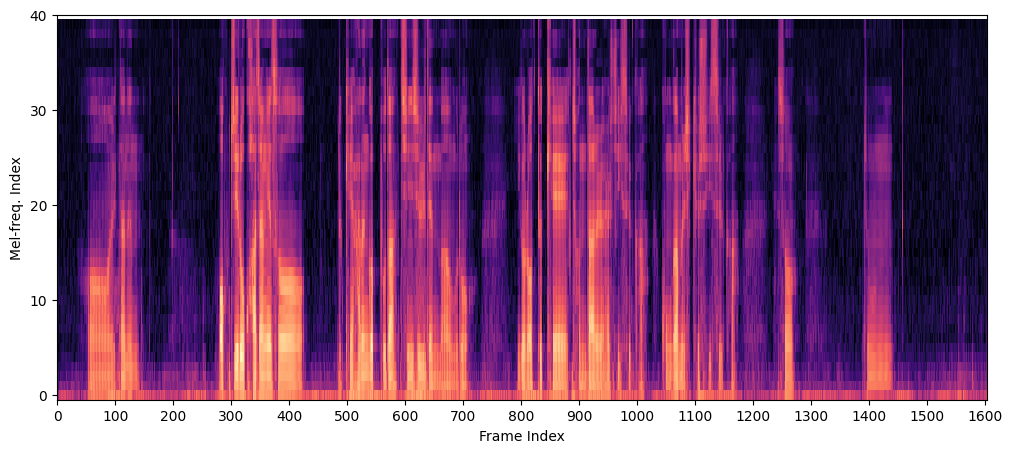

In [ ]:
hop_length = 160
n_fft = 512
win_length=320
window='hann'

n_mels = 40
fmin=0
fmax=None

S = librosa.feature.melspectrogram(
    y=samples,
    sr=sampling_rate,
    hop_length=hop_length, n_fft=n_fft, win_length=win_length, window=window,
    n_mels = n_mels, fmin=fmin, fmax=fmax)
S_dB = librosa.power_to_db(S, ref=np.max)
dim_feature, len_feature = S_dB.shape
fig = plt.figure()
librosa.display.specshow(S_dB, y_axis=None, x_axis=None)
fig.gca().set_yticks(range(0, dim_feature+1, 10))
fig.gca().set_xticks(range(0, len_feature, 100))
fig.gca().set_ylabel("Mel-freq. Index")
fig.gca().set_xlabel("Frame Index")


### SpecAug

구글에서 발표한 SpecAug 알고리즘에 대해서 실습해봅니다.
ESPnet 모듈이 필요합니다. SpecAug 기능만을 사용할 예정이므로 `--no-deps` 옵션을 주어서 간단히 설치합니다.

In [ ]:
!pip install espnet --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.0 MB/s eta 0:00:00


SpecAug 모듈을 초기화합니다. 각 파라미터의 값을 변경하면서 시도해 봅니다.

In [ ]:
from espnet2.asr.specaug.specaug import SpecAug
import torch

specaug = SpecAug(apply_time_warp=True,
                  time_warp_window=5,
                  num_freq_mask=2,
                  apply_freq_mask=True,
                  freq_mask_width_range=(0,30),
                  apply_time_mask=True,
                  num_time_mask=2,
                  time_mask_width_range=(0,40),
                 )
print(specaug)

SpecAug(
  (time_warp): TimeWarp(window=5, mode=bicubic)
  (freq_mask): MaskAlongAxis(mask_width_range=(0, 30), num_mask=2, axis=freq)
  (time_mask): MaskAlongAxis(mask_width_range=(0, 40), num_mask=2, axis=time)
)


실제 SpecAug를 적용합니다. 여러번 하면서 변화를 살펴봅니다.

In [ ]:
S_dB_in = torch.unsqueeze(torch.from_numpy(S_dB.copy().T), 0)
specaug(S_dB_in)
S_dB_out = torch.squeeze(S_dB_in, 0).numpy().T

plt.figure()
librosa.display.specshow(S_dB_out, sr=sampling_rate, hop_length=hop_length, y_axis="mel", x_axis="time")